In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sjeng_tableq_curved = "../../spec_stats/stats.sjeng.table_q.curved.100000000.txt"
sjeng_stride = "../../spec_stats/stats.sjeng.stride.100000000.txt"
sjeng_no = "../../spec_stats/stats.sjeng.no_prefetcher.100000000.txt"
results_table = "../../spec_stats/results.csv"

In [2]:
def get_x_y(filename, max_insts=100000000):
  sim_insts = []
  l2_hit = []
  l2_miss = []
  hundredm_index = 0
  with open(filename, "r") as f:
    for line in f.readlines():
      if "system.l2cache.overall_hits::.cpu.data" in line:
        l2_hit.append(int(line.split()[1]))
      elif "system.cpu.dcache.overall_misses::total" in line:
        l2_miss.append(int(line.split()[1]))
      elif "sim_insts" in line:
        num = int(line.split()[1])
        if max_insts is not None and num >= max_insts and hundredm_index == 0:
          hundredm_index = len(sim_insts)
        sim_insts.append(num)
  l2_miss_ratio = [miss / (miss + hit) for (hit, miss) in zip(l2_hit, l2_miss)]
  if max_insts is not None:
    return sim_insts[:hundredm_index], l2_miss_ratio[:hundredm_index]
  else:
    return sim_insts, l2_miss_ratio

In [3]:
sim_insts_q, l2_miss_q = get_x_y(sjeng_tableq_curved)
sim_insts_q_bill, l2_miss_q_bill = get_x_y(sjeng_tableq_curved, max_insts=None)
sim_insts_stride, l2_miss_stride = get_x_y(sjeng_stride)
sim_insts_no, l2_miss_no = get_x_y(sjeng_no)

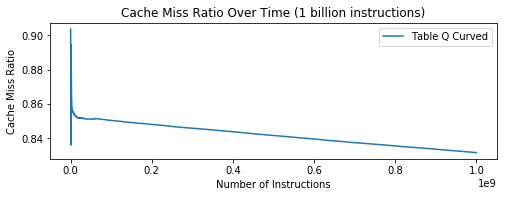

In [4]:
plt.figure(figsize=(8,2.5))
plt.title("Cache Miss Ratio Over Time (1 billion instructions)")
sns.lineplot(sim_insts_q_bill, l2_miss_q_bill, label="Table Q Curved")
plt.xlabel("Number of Instructions")
plt.ylabel("Cache Miss Ratio")
plt.show()

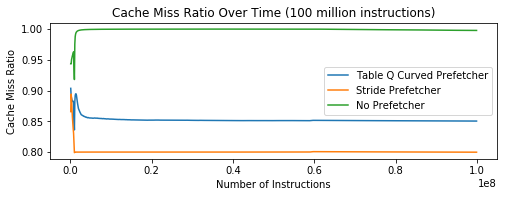

In [5]:
plt.figure(figsize=(8,2.5))
plt.title("Cache Miss Ratio Over Time (100 million instructions)")
sns.lineplot(sim_insts_q, l2_miss_q, label="Table Q Curved Prefetcher")
sns.lineplot(sim_insts_stride, l2_miss_stride, label="Stride Prefetcher")
sns.lineplot(sim_insts_no, l2_miss_no, label="No Prefetcher")
plt.xlabel("Number of Instructions")
plt.ylabel("Cache Miss Ratio")
plt.show()

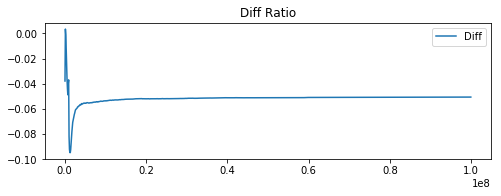

In [6]:
plt.figure(figsize=(8,2.5))
plt.title("Diff Ratio")
diffq = [stride - q for stride, q in zip(l2_miss_stride, l2_miss_q)]
sns.lineplot(sim_insts_q, diffq, label="Diff")
plt.show()

In [7]:
len(sim_insts_q)

999

In [8]:
len(sim_insts_q_bill)

10000

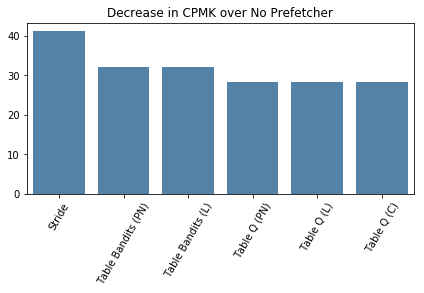

In [9]:
cmpk_decrease = {"Stride": 41.27153, "Table Bandits (PN)": 32.23268, "Table Bandits (L)": 32.23577, "Table Q (PN)": 28.27133, "Table Q (L)": 28.32099, "Table Q (C)": 28.32099}
names = list(cmpk_decrease.keys())
values = list(cmpk_decrease.values())    
g = sns.barplot(x=names,y=values,color='steelblue')
g.set_xticklabels(labels=names,rotation=60)
plt.tight_layout()
# plt.ylabel("")
plt.title('Decrease in CPMK over No Prefetcher')
plt.show()

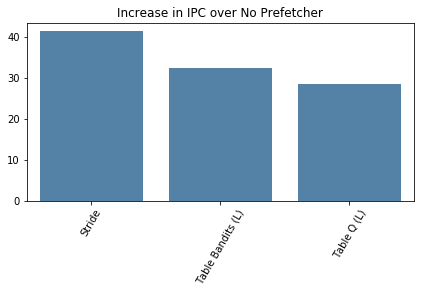

In [10]:
ipc_increase = {"Stride": 41.27153, "Table Bandits (L)": 32.23577, "Table Q (L)": 28.32099}
names = list(ipc_increase.keys())
values = list(ipc_increase.values())    
g = sns.barplot(x=names,y=values,color='steelblue')
g.set_xticklabels(labels=names,rotation=60)
plt.tight_layout()
# plt.ylabel("")
plt.title('Increase in IPC over No Prefetcher')
plt.show()

In [20]:
results_df = pd.read_csv(results_table)

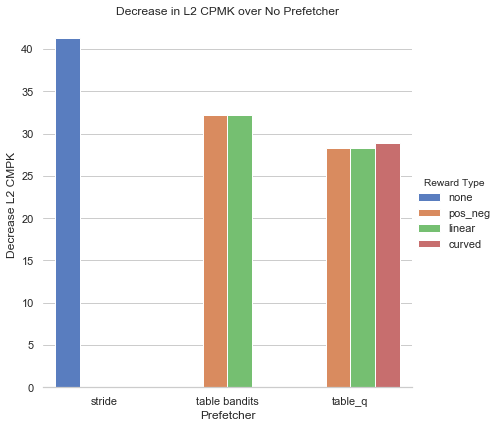

In [21]:
include_columns = [4, 5, 6, 8, 9, 10]

sns.set(style="whitegrid")
g = sns.catplot(x="Prefetcher", y="Decrease L2 CMPK", hue="Reward Type", data=results_df.loc[include_columns],
                height=6, kind="bar", palette="muted")
g.despine(left=True)
plt.title('Decrease in L2 CPMK over No Prefetcher')
plt.show()

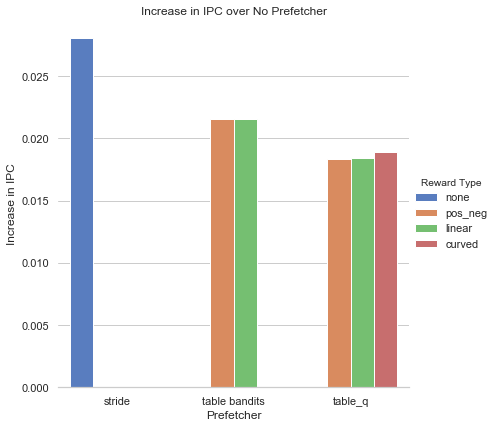

In [23]:
include_columns = [4, 5, 6, 8, 9, 10]

sns.set(style="whitegrid")
g = sns.catplot(x="Prefetcher", y="Increase in IPC", hue="Reward Type", data=results_df.loc[include_columns],
                height=6, kind="bar", palette="muted")
g.despine(left=True)
plt.title('Increase in IPC over No Prefetcher')
plt.show()

In [14]:
results_df.loc[include_columns]

,Benchmark,Prefetcher,Reward Type,Max Instructions,system.cpu.ipc,system.cpu.dcache.overall_misses::total,system.l2cache.overall_misses::.cpu.data,sim_insts,L1 CMPK,L2 CMPK,Diff None IPC,Decrease L2 CMPK
4,sjeng,stride,NaN,100000000.0,0.102892,16637283.0,4176296.0,100000000.0,166.37283,41.76296,0.028061,41.27153
5,sjeng,table bandits,pos_neg,100000000.0,0.096359,16638050.0,5080181.0,100000000.0,166.3805,50.80181,0.021528,32.23268
6,sjeng,table bandits,linear,100000000.0,0.096357,16638084.0,5079872.0,100000000.0,166.38084,50.79872,0.021526,32.23577
8,sjeng,table_q,pos_neg,100000000.0,0.093191,16637219.0,5476316.0,100000000.0,166.37219,54.76316,0.018360,28.27133
9,sjeng,table_q,linear,100000000.0,0.093240,16637194.0,5471350.0,100000000.0,166.37194,54.7135,0.018409,28.32099
10,sjeng,table_q,curved,100000000.0,0.093712,16637154.0,5414105.0,100000055.0,166.3714485,54.14102022,0.018881,28.89347
